In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import pandas as pd
training = pd.read_csv("train.csv");

x_test = pd.read_csv("test.csv");

In [9]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(x_train))
zee = (np.where(z > 3))[1]

print("number of data examples greater than 3 standard deviations = %i " % len(zee))

number of data examples greater than 3 standard deviations = 76 


In [11]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,0,3,0,22.0,1,0,7.2500,2,1,0
1,1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,0,35.0,0,0,8.0500,2,0,1


In [12]:
y_train = x_train["Survived"]
x_train = x_train.drop(['Survived'], axis = 1)

print(y_train.shape )
y_train.head(20)

(712,)


0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
18    0
20    0
21    1
22    1
Name: Survived, dtype: int64

In [13]:
import matplotlib.pyplot as plt
classes = np.array(list(y_train.values))

def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(x_train.Pclass, x_train.Embarked)
f.add_subplot(332)
plotRelation(x_train.Pclass, x_train.Age)
f.add_subplot(333)
plotRelation(x_train.Age, x_train.Sex)
f.add_subplot(334)
plotRelation(x_train.SibSp, x_train.Parch)
f.add_subplot(335)
plotRelation(x_train.Fare, x_train.Embarked)
f.add_subplot(336)
plotRelation(x_train.Fare, x_train.Embarked)

In [14]:
x_test.drop(["Name","Ticket","Cabin" ], inplace = True, axis = 1 )
x_test.replace({"Sex": repCol3, "Embarked": repCol8} , inplace = True )
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers
#y_train = np_utils.to_categorical(y_train)

InputDimension = 9
print(y_train.shape )

model = Sequential()
model.add(Dense(10, input_dim=InputDimension, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(2, activation='softmax'))


earlystopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x_train, pd.get_dummies(y_train), epochs=1000, batch_size=200, validation_split=0.2, verbose=0, callbacks=[earlystopping])

Using TensorFlow backend.
c:\users\kumars271\python 64\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kumars271\python 64\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kumars271\python 64\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\kumars271\python 64\lib\site-packages\tensorflow\python\fra

(712,)


W0807 01:11:48.001652  7340 deprecation_wrapper.py:119] From c:\users\kumars271\python 64\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 01:11:48.024946  7340 deprecation_wrapper.py:119] From c:\users\kumars271\python 64\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0807 01:11:48.252042  7340 deprecation.py:323] From c:\users\kumars271\python 64\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 01:11:48.373934  7340 deprecation_wrapper.py:119] From c:\users\kumars271\python 64\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please

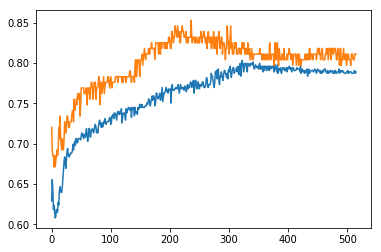

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [17]:
id = x_test['PassengerId']

x_test.drop(['PassengerId'], inplace = True, axis = 1)

x_test['Family'] = x_test ['SibSp'] + x_test['Parch']
x_test['IsAlone'] = 1
x_test['IsAlone'].loc[x_test['Family'] > 0] = 0


x_test.fillna( x_test.median() ,inplace = True)
# x_test = x_test/ x_test.max()

c:\users\kumars271\python 64\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:

predictions = model.predict(x_test)

Predictions will return probability between 0 and 1 for survived or non survived so i will take the argmax() of the array to get the max index for each test example

In [19]:
predictions = np.rint(predictions)

In [20]:
predict = pd.DataFrame(predictions, columns=['0', '1']).astype('int')
predict['Survived'] = 0
predict.loc[predict['0'] == 1, 'Survived'] = 0
predict.loc[predict['1'] == 1, 'Survived'] = 1

In [21]:
id.reset_index(drop=True, inplace=True)
output = pd.concat([id,predict['Survived'] ], axis=1)
output.to_csv('titanic-predictions.csv', index = False)
output.head(100)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
